In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

calendrier_challenge = pd.read_parquet("challenge_data/calendrier_challenge.parquet")
questionnaire = pd.read_parquet("challenge_data/questionnaire.parquet")
consos_challenge = pd.read_parquet("challenge_data/consos_challenge.parquet")
temperatures = pd.read_parquet("challenge_data/temperatures.parquet")

min_date = datetime.datetime(2009,7,15)
max_date=datetime.datetime(2011,1,1)
all_clients = list(set(consos_challenge["id_client"]))
day = datetime.datetime(2011,1,2)-datetime.datetime(2011,1,1)
id_client = all_clients[0]

In [24]:
print("Nombre de clients : ", len(all_clients))
print("date de début :",min_date)
print("date de fin :", max_date)

Nombre de clients :  615
date de début : 2009-07-15 00:00:00
date de fin : 2011-01-01 00:00:00


Visualisation du signal sur une semaine

C:\Users\paulc\AppData\Local\Temp/ipykernel_43368/2360708507.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]
C:\Users\paulc\AppData\Local\Temp/ipykernel_43368/2360708507.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signal2 = consos_challenge[consos_challenge["id_client"]==id_client2][consos_challenge['horodate']<min_date+7*day]


<AxesSubplot:xlabel='horodate'>

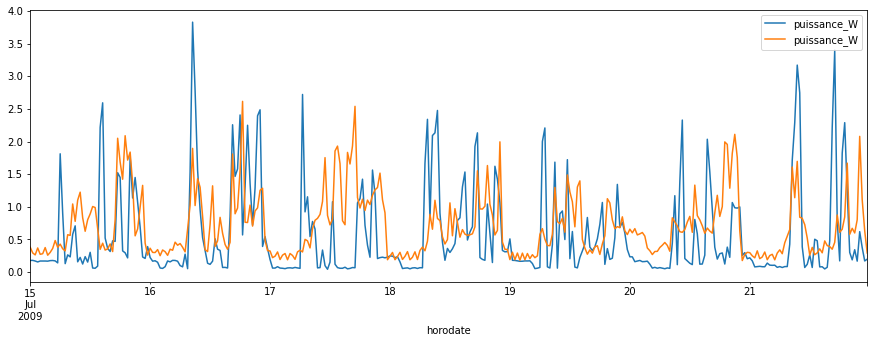

In [35]:
id_client2 = all_clients[1]
fig, ax = plt.subplots(figsize=(15,5))
signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]
signal.plot(x='horodate',y='puissance_W',ax=ax)

signal2 = consos_challenge[consos_challenge["id_client"]==id_client2][consos_challenge['horodate']<min_date+7*day]
signal2.plot(x='horodate',y='puissance_W',ax=ax)

Signal moyen pour un client

In [97]:
mean_signal=[]
mean_signal2=[]

def load_signal(id_client,min_time,max_time):

    data = consos_challenge[consos_challenge["id_client"]==id_client]
    data1 = data[data["horodate"]>min_time]
    return data1[data1["horodate"]<=max_time].puissance_W

# for i in range(0,536):
#     signal = load_signal(id_client,min_date+i*day,min_date+(i+1)*day)
#     if len(signal)==48:
#         mean_signal.append(signal)

# for i in range(0,536):
#     signal2 = load_signal(id_client2,min_date+i*day,min_date+(i+1)*day)
#     if len(signal2)==48:
#         mean_signal2.append(signal2)

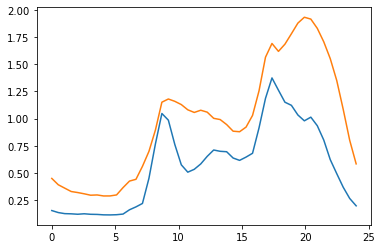

In [39]:
plt.plot(np.linspace(0,24,48),np.mean(mean_signal,axis=0))
plt.plot(np.linspace(0,24,48),np.mean(mean_signal2,axis=0))

Signal normalisée pour chaque client avec sa moyenne journalière

C:\Users\paulc\AppData\Local\Temp/ipykernel_43368/3123468675.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]
C:\Users\paulc\AppData\Local\Temp/ipykernel_43368/3123468675.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  signal2 = consos_challenge[consos_challenge["id_client"]==id_client2][consos_challenge['horodate']<min_date+7*day]


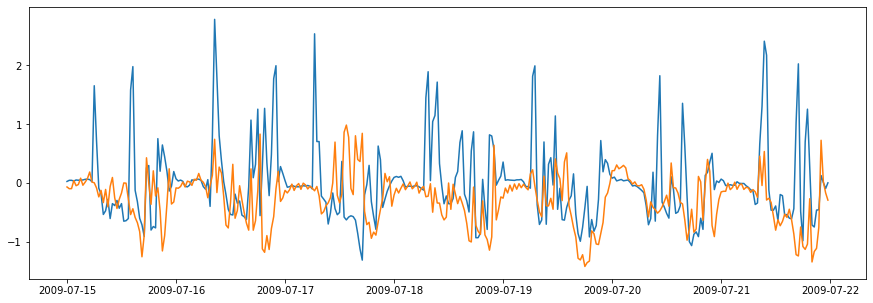

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
signal = consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge['horodate']<min_date+7*day]
signal_normalized = signal.puissance_W-np.array(7*list(np.mean(mean_signal,axis=0)))
plt.plot(signal.horodate,signal_normalized)

signal2 = consos_challenge[consos_challenge["id_client"]==id_client2][consos_challenge['horodate']<min_date+7*day]
signal_normalized2 = signal2.puissance_W-np.array(7*list(np.mean(mean_signal2,axis=0)))
plt.plot(signal.horodate,signal_normalized2)

Signal moyen sur une semaine par tout les clients

In [22]:
mean_date = []
print(len(all_clients))
for client in all_clients:
    signal = load_signal(client,min_date+110*day,min_date+117*day)
    mean_date.append(signal)

615


C:\Users\paulc\AppData\Local\Temp/ipykernel_43368/3229844332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge["horodate"]>min_time][consos_challenge["horodate"]<=max_time].puissance_W


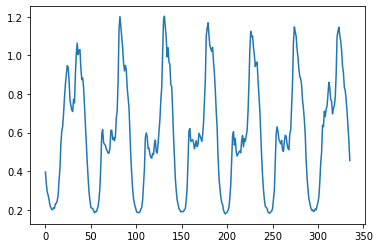

In [23]:
signaldate = np.mean(mean_date,axis=0)
plt.plot(signaldate)

Variation par jour

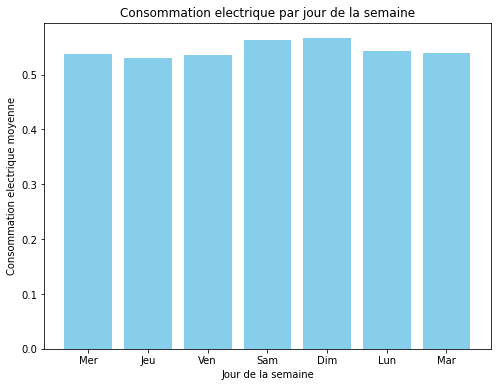

In [30]:
jours = ["Mer","Jeu","Ven","Sam","Dim","Lun","Mar"]
mean_taxi_counts = []
X = consos_challenge
for j in range(1, 8):
    print(j)
    mean_taxi_counts.append(np.mean([X[X["horodate"]>(min_date+(7*i+j)*day)][X["horodate"]<=(min_date+(7*i+j+1)*day)]['puissance_W'] for i in range(52)]))

plt.figure(figsize=(8, 6))
plt.bar(jours, mean_taxi_counts, color='skyblue')
plt.xlabel('Jour de la semaine')
plt.ylabel('Consommation electrique moyenne')
plt.title('Consommation electrique par jour de la semaine')
plt.show()

Variation saisonière

C:\Users\paulc\AppData\Local\Temp/ipykernel_43368/1079148274.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_electricity.append(np.mean([X[X["horodate"]>(min_date+i*day)][X["horodate"]<=(min_date+(i+1)*day)].puissance_W]))


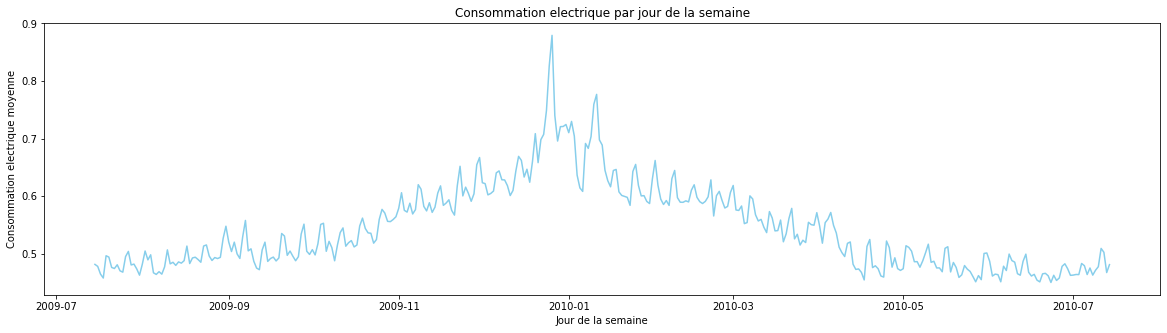

In [34]:
jours = [min_date+i*day for i in range(365)]
mean_electricity = []
X = consos_challenge
for i in range(365):
    mean_electricity.append(np.mean([X[X["horodate"]>(min_date+i*day)][X["horodate"]<=(min_date+(i+1)*day)].puissance_W]))

plt.figure(figsize=(20, 5))
plt.plot(jours, mean_electricity, color='skyblue')
plt.xlabel("Jour de l'année")
plt.ylabel('Consommation electrique moyenne')
plt.title("Consommation electrique par jour de l'année")
plt.show()

Prediction par modulo 365

2048
4100
4104
4106
6154
2061
6157
6163
6165
6166
6174
4129
6181
2092
4142
6191
4145
4146
6193
4158
2119
6226
2133
2135
6234
4191
2151
4199
2156
4213
2167
6263
4222
6273
2187
2188
2192
4241
2199
4247
6295
2203
2215
6315
6140
4273
2229
2231
6336
2251
9.0484
0.9031543270833332


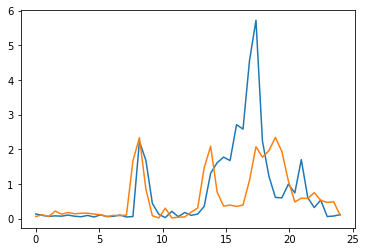

In [99]:
y_test = []
y_predict = []
for id in all_clients[0:50]:
    for i in range(20):
        y_test.append(np.array(load_signal(id_client,max_date-(50+3*i)*day,max_date-(49+3*i)*day)))
        y_predict.append(np.array(load_signal(id_client,max_date-(50+365+3*i)*day,max_date-(49+365+3*i)*day)))

y_test = np.array(y_test)
y_predict = np.array(y_predict)
print(np.mean(np.abs(y_test.sum(axis=1)-y_predict.sum(axis=1))))
print(np.mean((y_test-y_predict)**2))
plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-50*day,max_date-49*day)))
plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-(50+365)*day,max_date-(49+365)*day)))

Prediction vis à vis de la veille

8.0972
0.8932087666666666


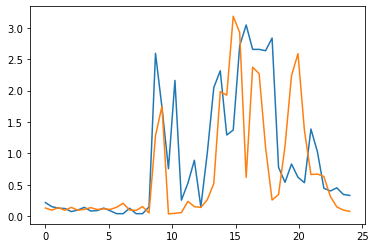

In [101]:
y_test = []
y_predict = []
for id in all_clients[0:50]:
    for i in range(20):
        y_test.append(np.array(load_signal(id_client,max_date-(40+3*i)*(day),max_date-(39+3*i)*(day))))
        y_predict.append(np.array(load_signal(id_client,max_date-(39+3*i)*day,max_date-(38+3*i)*day)))

y_test = np.array(y_test)
y_predict = np.array(y_predict)
print(np.mean(np.abs(y_test.sum(axis=1)-y_predict.sum(axis=1))))
print(np.mean((y_test-y_predict)**2))

plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-40*day,max_date-39*day)))
plt.plot(np.linspace(0,24,48),np.array(load_signal(id_client,max_date-(39)*day,max_date-(38)*day)))

Tendance année globale + tendance individuelle

2.0103337195629782
0.5179898541679728


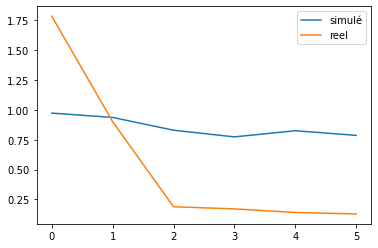

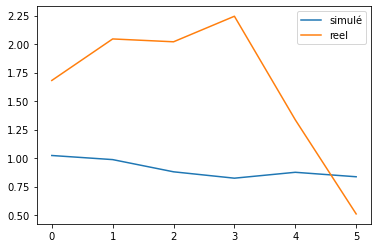

In [107]:
def repeat(n,l):
    new_l = []
    for elt in l:
        for i in range(n):
            new_l.append(elt)
    return new_l

start_date =datetime.datetime(2009,7,15,18)
y_predict = []
y_test = []
for client in all_clients:
    y_testyear = np.array(load_signal(client,start_date,start_date+365*day))
    X_signal = np.array(load_signal(client,start_date,start_date+365*day)) - repeat(48,mean_electricity)
    meanX_signal = np.zeros(48)
    for i in range(0,365):
        loc_signal = X_signal[48*i:48*(i+1)]
        meanX_signal = meanX_signal +loc_signal
    for id_day in range(365):
        y_predict.append(meanX_signal[0:6]/365+mean_electricity[id_day])
        y_test.append(y_testyear[48*id_day:48*(id_day)+6])


y_test = np.array(y_test)
y_predict = np.array(y_predict)
print(np.mean(np.abs(y_test.sum(axis=1)-y_predict.sum(axis=1))))
print(np.mean((y_test-y_predict)**2))



plt.plot(y_predict[10],label='simulé')
plt.plot(y_test[10],label='reel')
plt.legend()
plt.show()
plt.plot(y_predict[100],label='simulé')
plt.plot(y_test[100],label='reel')
plt.legend()
plt.show()

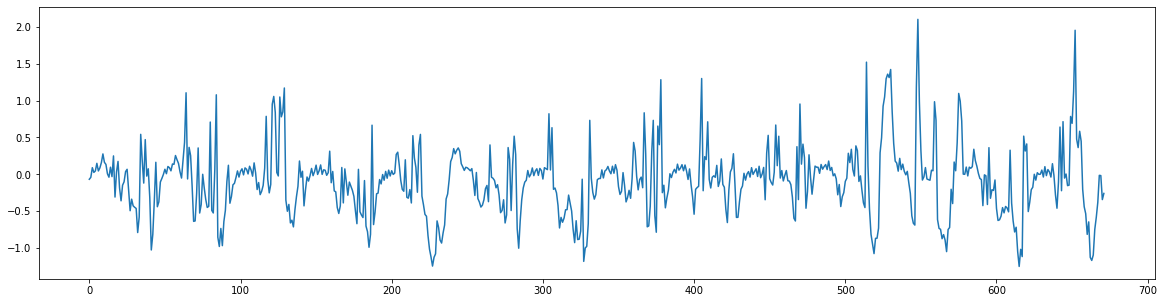

In [92]:
fig, ax = plt.subplots(figsize=(20,5))
difference = np.array([np.array(true_signal[48*i:48*(i+1)])-np.array(meanX_signal/365+mean_electricity[i]) for i in range(365)])
plt.plot(difference.flatten()[0:48*14])